### **Project Title: Heart Disease Severity Prediction**  

#### **Introduction**  
Heart disease is a serious health issue that affects millions of people worldwide. Early detection and severity prediction can help in better treatment and prevention. This project aims to build a machine learning model that predicts the severity of heart disease based on different health factors.  

#### **Project Overview**  
The dataset used in this project is from Kaggle: [Heart Disease Dataset](https://www.kaggle.com/datasets/arezaei81/heartcsv). It contains various medical features like age, cholesterol, blood pressure, and more, which help determine heart disease severity. The project involves cleaning the data, performing analysis, and using classification models to make predictions.  

#### **Objectives**  
- Understand and analyze the dataset.  
- Clean and preprocess the data.  
- Apply different classification models for prediction.  
- Compare model performance using accuracy.  
- Deploy the best model for real-world usage.

### **Step 1: Import necessary libraries and load the dataset**

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("heart.csv")

# Display the first few rows
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


### **Step 2: Basic Data explorations**

In [3]:
print(data.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [4]:
# Rename columns with full names
# Here we have to rename the columns with descriptive names for better readability.
data = data.rename(columns={
    "age": "Age",                        # age: Age of the patient
    "sex": "Sex",                        # sex: Gender (1 = male, 0 = female)
    "cp": "Chest Pain Type",             # cp: Chest pain type (categorical)
    "trestbps": "Resting Blood Pressure",# trestbps: Resting blood pressure (mm Hg)
    "chol": "Cholesterol",               # chol: Serum cholesterol (mg/dL)
    "fbs": "Fasting Blood Sugar",        # fbs: Fasting blood sugar > 120 mg/dL (1 = true, 0 = false)
    "restecg": "Resting ECG",            # restecg: Resting electrocardiographic results
    "thalach": "Max Heart Rate",         # thalach: Maximum heart rate achieved
    "exang": "Exercise Induced Angina",  # exang: Exercise-induced angina (1 = yes, 0 = no)
    "oldpeak": "ST Depression",          # oldpeak: ST depression induced by exercise
    "slope": "Slope of ST Segment",      # slope: Slope of the peak exercise ST segment
    "ca": "Number of Major Vessels",     # ca: Number of major vessels colored by fluoroscopy
    "thal": "Thalassemia",               # thal: Thalassemia (categorical)
    "target": "Target"   # target: Heart disease (1 = disease, 0 = no disease)
})

# Display updated column names
data.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression,Slope of ST Segment,Number of Major Vessels,Thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Display 5 random samples from the dataset
data.sample(5)

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression,Slope of ST Segment,Number of Major Vessels,Thalassemia,Target
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3,0
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [6]:
# Shape of the datasets
print(data.shape)

(303, 14)


In [7]:
# Check dataset information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Sex                      303 non-null    int64  
 2   Chest Pain Type          303 non-null    int64  
 3   Resting Blood Pressure   303 non-null    int64  
 4   Cholesterol              303 non-null    int64  
 5   Fasting Blood Sugar      303 non-null    int64  
 6   Resting ECG              303 non-null    int64  
 7   Max Heart Rate           303 non-null    int64  
 8   Exercise Induced Angina  303 non-null    int64  
 9   ST Depression            303 non-null    float64
 10  Slope of ST Segment      303 non-null    int64  
 11  Number of Major Vessels  303 non-null    int64  
 12  Thalassemia              303 non-null    int64  
 13  Target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [8]:
# Check for missing values
print(data.isnull().sum())

Age                        0
Sex                        0
Chest Pain Type            0
Resting Blood Pressure     0
Cholesterol                0
Fasting Blood Sugar        0
Resting ECG                0
Max Heart Rate             0
Exercise Induced Angina    0
ST Depression              0
Slope of ST Segment        0
Number of Major Vessels    0
Thalassemia                0
Target                     0
dtype: int64


In [9]:
# Summary statistics
data.describe()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression,Slope of ST Segment,Number of Major Vessels,Thalassemia,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


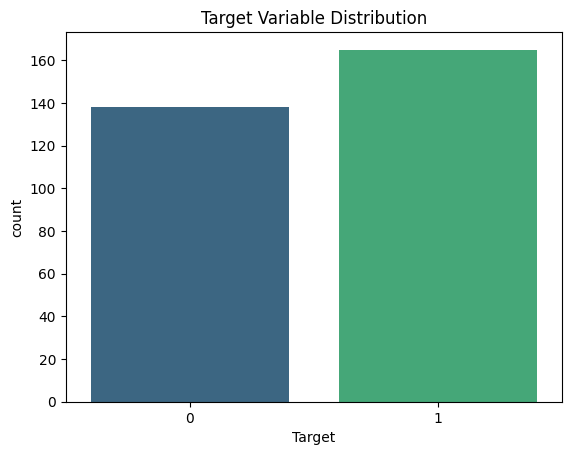

In [10]:
# Count plot for Target Column
sns.countplot(x="Target", data=data, hue="Target", palette="viridis", legend=False)
plt.title("Target Variable Distribution")
plt.show()


In [11]:
# Checking correlation between columns
print(data.corr()["Target"].abs().sort_values(ascending=False))

Target                     1.000000
Exercise Induced Angina    0.436757
Chest Pain Type            0.433798
ST Depression              0.430696
Max Heart Rate             0.421741
Number of Major Vessels    0.391724
Slope of ST Segment        0.345877
Thalassemia                0.344029
Sex                        0.280937
Age                        0.225439
Resting Blood Pressure     0.144931
Resting ECG                0.137230
Cholesterol                0.085239
Fasting Blood Sugar        0.028046
Name: Target, dtype: float64


====> This shows that most columns are moderately correlated with target, but 'Fasting Blood Sugar(fbs)' is very weakly correlated.

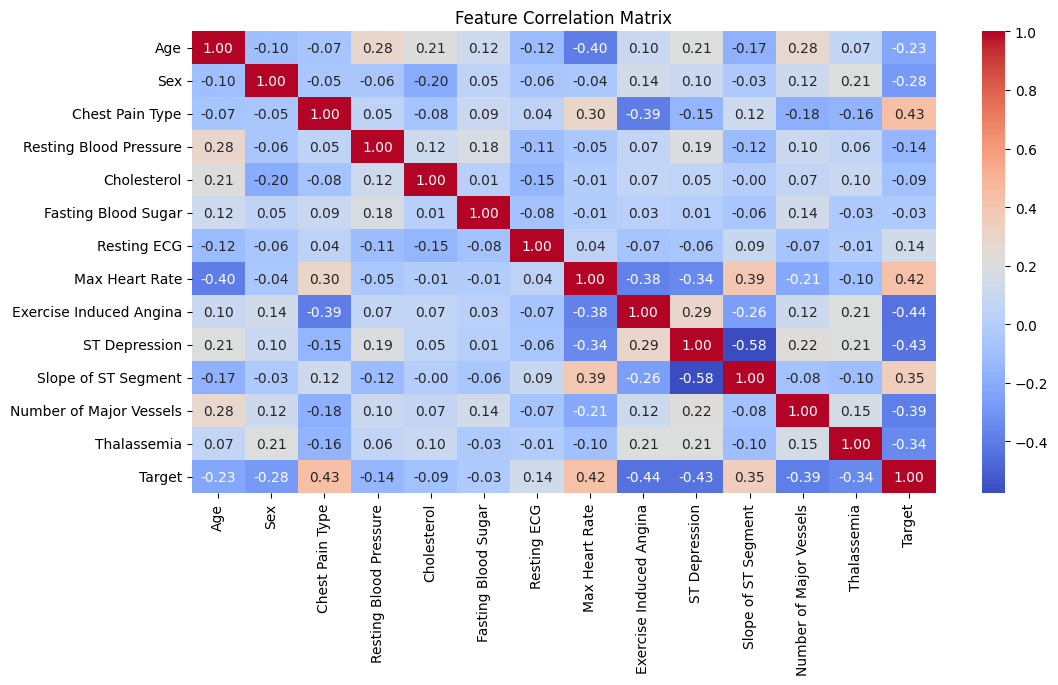

In [12]:
# Check correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

### **Step 3: Exploratory Data Analysis (EDA)**

In [13]:
# Print Unique Values for Each Column
for column in data.columns:
    print(f"Unique values in '{column}':\n{data[column].unique()}\n")


Unique values in 'Age':
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

Unique values in 'Sex':
[1 0]

Unique values in 'Chest Pain Type':
[3 2 1 0]

Unique values in 'Resting Blood Pressure':
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]

Unique values in 'Cholesterol':
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 

=====> We concluded that in out datasets, there are categorical and numerical columns. So Before performing EDA, we explore all columns in details as:

Here’s the classification of **categorical** and **numerical** columns in our dataset:
##### **Categorical Columns (Discrete Values)**

| Column Name                 | Description                              | Unique Values Example |
|-----------------------------|------------------------------------------|----------------------|
| **Sex**                     | Gender (0 = Female, 1 = Male)            | [0, 1]             |
| **Chest Pain Type**         | Type of chest pain (0-3)                 | [0, 1, 2, 3]       |
| **Fasting Blood Sugar**     | Blood sugar > 120 mg/dl (0 = No, 1 = Yes) | [0, 1]             |
| **Resting ECG**             | Resting electrocardiographic results      | [0, 1, 2]          |
| **Exercise Induced Angina** | Exercise-induced angina (0 = No, 1 = Yes) | [0, 1]             |
| **Slope of ST Segment**     | Slope of peak exercise ST segment         | [0, 1, 2]          |
| **Number of Major Vessels** | Major vessels (0-4) detected by fluoroscopy | [0, 1, 2, 3, 4]  |
| **Thalassemia**             | Blood disorder indicator (1-3)           | [1, 2, 3]          |
| **Target**                  | Heart disease presence (0 = No, 1 = Yes) | [0, 1]             |

-------------------------------------------------

##### **Numerical Columns (Continuous Values)**

| Column Name                      | Description                            | Example Values |
|-----------------------------------|----------------------------------------|---------------|
| **Age**                          | Age in years                          | [63, 37, 41] |
| **Resting Blood Pressure**        | Blood pressure in mm Hg               | [145, 130, 120] |
| **Cholesterol**                   | Serum cholesterol in mg/dl            | [233, 250, 204] |
| **Max Heart Rate**                | Maximum heart rate achieved           | [150, 187, 172] |
| **ST Depression**                 | ST depression induced by exercise     | [2.3, 3.5, 1.4] |

-------------------------------------------------
Here are the plot that we will use for plotting purpose in further steps.
- Categorical features ===> Countplot 
- Continuous features ===> Histogram & Boxplot 
- Relation with target ===> Boxplot or Countplot

#### **First analysing the target variable**

In [34]:
# Unique values in Target
print("Unique values in Target Column:")
print(data["Target"].value_counts())

Unique values in Target Column:
Target
1    165
0    138
Name: count, dtype: int64


In [35]:
#Alternatively,
print("Percentage of patience with heart problems: "+str(data["Target"].where(data["Target"]==1).count()*100/303))
print("Percentage of patience without heart problems: "+str(data["Target"].where(data["Target"]==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience with heart problems: 54.45544554455446
Percentage of patience without heart problems: 45.54455445544554


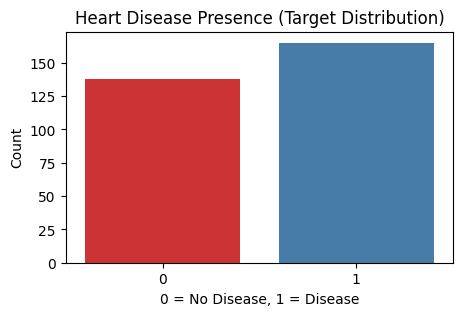

In [37]:
# Plot Target distribution
plt.figure(figsize=(5, 3))
sns.countplot(x="Target", data=data, hue="Target", palette="Set1", legend=False)
plt.title("Heart Disease Presence (Target Distribution)")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Count")
plt.show()

#### **1. Age**

In [28]:
# Find minimum and maximum age
min_age = data["Age"].min()
max_age = data["Age"].max()

# Calculate age range
age_range = max_age - min_age

print(f"Youngest Patient Age: {min_age}")
print(f"Oldest Patient Age: {max_age}")
print(f"Age Range: {age_range}")

Youngest Patient Age: 29
Oldest Patient Age: 77
Age Range: 48


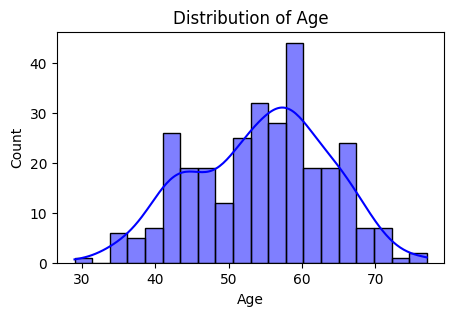

In [38]:
# Histogram plot for Age Column
plt.figure(figsize=(5, 3))
sns.histplot(data["Age"], kde=True, bins=20, color="blue")
plt.title("Distribution of Age")
plt.show()

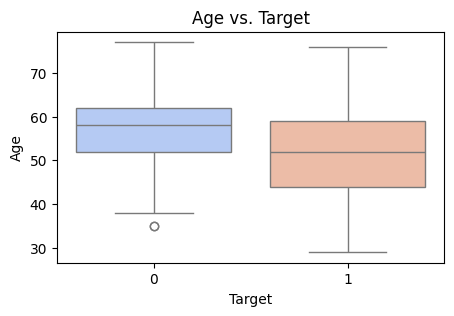

In [57]:
# Distribution of Age with Target Variable
plt.figure(figsize=(5, 3))
sns.boxplot(x=data["Target"], y=data["Age"], palette="coolwarm", hue = data["Target"], legend = False)
plt.title("Age vs. Target")
plt.show()

#### **2. Sex**

In [40]:
# Print the values count for sex features
print(data["Sex"].value_counts())

Sex
1    207
0     96
Name: count, dtype: int64


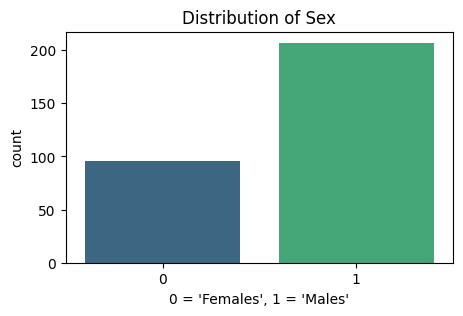

In [53]:
# Count plot for sex features
plt.figure(figsize=(5, 3))
sns.countplot(x=data["Sex"], palette="viridis", hue = data["Sex"], legend=False)
plt.title("Distribution of Sex")
plt.xlabel("0 = 'Females', 1 = 'Males'")
plt.show()

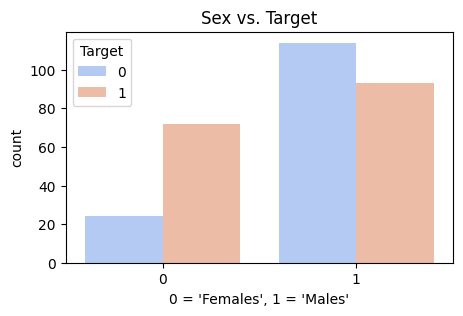

In [51]:
# Distribution of sex features with target variable
plt.figure(figsize=(5, 3))
sns.countplot(x=data["Sex"], hue=data["Target"], palette="coolwarm")
plt.title("Sex vs. Target")
plt.xlabel("0 = 'Females', 1 = 'Males'")
plt.show()

=====> Heart disease occurs more in female as compare to male, we clearly seen from the above plot.

#### **3. Chest Pain Type**

In [63]:
# values counts of Chest Pain Type column
print(data["Chest Pain Type"].value_counts())


Chest Pain Type
0    143
2     87
1     50
3     23
Name: count, dtype: int64


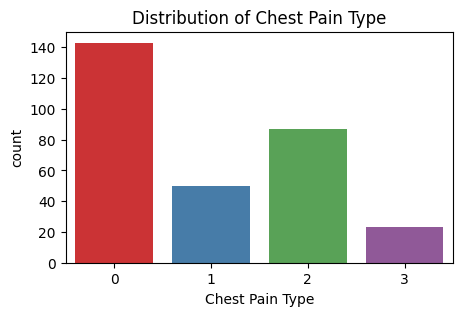

In [66]:
# Distribution of Chest Pain Type column
plt.figure(figsize=(5, 3))
sns.countplot(x=data["Chest Pain Type"], palette="Set1", hue = data["Chest Pain Type"], legend = False)
plt.title("Distribution of Chest Pain Type")
plt.show()

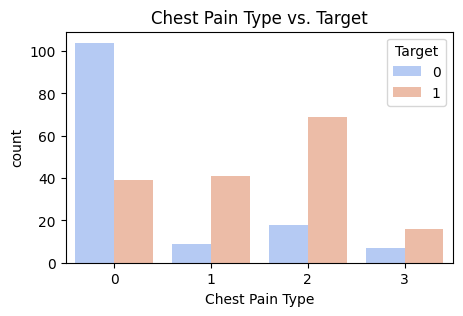

In [67]:
# Distribution of Chest Pain Type with target column
plt.figure(figsize=(5, 3))
sns.countplot(x=data["Chest Pain Type"], hue=data["Target"], palette="coolwarm")
plt.title("Chest Pain Type vs. Target")
plt.show()

=====> Chest pain types 1, 2, and 3 are strongly associated with heart disease, while type 0 is less correlated.

#### **4. Resting Blood Pressure**

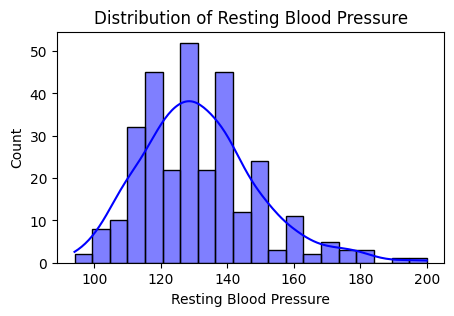

In [68]:
# Distribution of Resting Blood Pressure
plt.figure(figsize=(5, 3))
sns.histplot(data["Resting Blood Pressure"], kde=True, bins=20, color="blue")
plt.title("Distribution of Resting Blood Pressure")
plt.show()

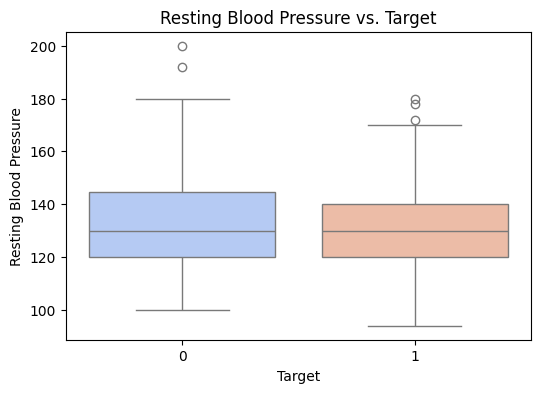

In [70]:
# Distribution of Resting Blood Pressure with target variable
plt.figure(figsize=(6, 4))
sns.boxplot(x=data["Target"], y=data["Resting Blood Pressure"], palette="coolwarm", hue = data["Target"], legend = False)
plt.title("Resting Blood Pressure vs. Target")
plt.show()

=====> The box plot shows that individuals with and without heart disease have a similar distribution of resting blood pressure. However, the median resting blood pressure is slightly higher for those without heart disease (target=0) compared to those with heart disease (target=1). The data also includes some outliers in both groups.

#### **5. Cholesterol**

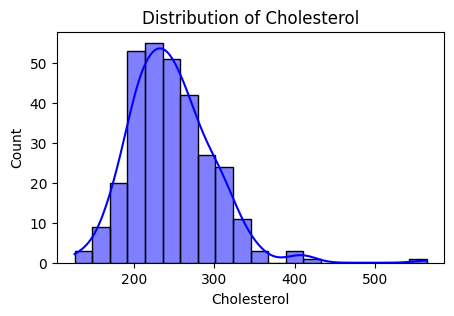

In [71]:
# Histogram plot of Cholestrol
plt.figure(figsize=(5, 3))
sns.histplot(data["Cholesterol"], kde=True, bins=20, color="blue")
plt.title("Distribution of Cholesterol")
plt.show()

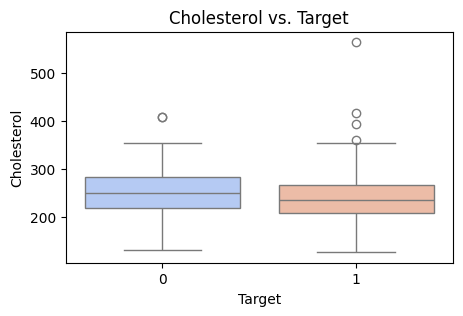

In [73]:
# Distribution of Cholestrol with Target variable
plt.figure(figsize=(5, 3))
sns.boxplot(x=data["Target"], y=data["Cholesterol"], palette="coolwarm", hue = data["Target"], legend = False)
plt.title("Cholesterol vs. Target")
plt.show()

=====> Individuals without heart disease (target=0) tend to have slightly higher median cholesterol levels compared to those with heart disease (target=1), though both groups show a wide range of values and numerous outliers.

#### **6. Fasting Blood Sugar**

In [74]:
# Values counts of Fasting Blood Sugar
print(data["Fasting Blood Sugar"].value_counts())

Fasting Blood Sugar
0    258
1     45
Name: count, dtype: int64


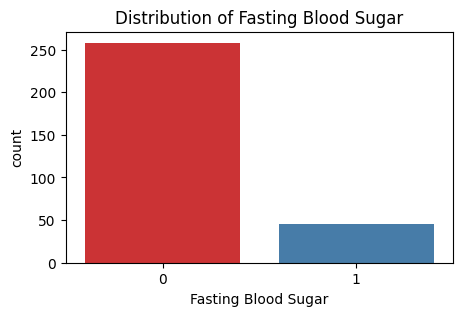

In [76]:
# Countplot for Fasting Blood Sugar
plt.figure(figsize=(5, 3))
sns.countplot(x=data["Fasting Blood Sugar"], palette="Set1", hue = data["Fasting Blood Sugar"], legend = False)
plt.title("Distribution of Fasting Blood Sugar")
plt.show()

=====> People suffered from Fasting Blood Sugar are less.The majority of individuals in the dataset have normal fasting blood sugar levels (0), while a smaller portion exhibits elevated levels (1).

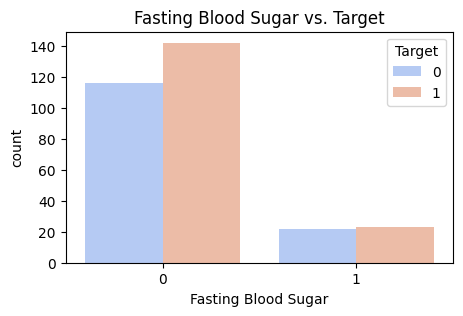

In [77]:
# Distributuion of Fasting Blood Sugar with Target variable
plt.figure(figsize=(5, 3))
sns.countplot(x=data["Fasting Blood Sugar"], hue=data["Target"], palette="coolwarm")
plt.title("Fasting Blood Sugar vs. Target")
plt.show()

=====> Normal fasting blood sugar levels (0) are more common in individuals with heart disease, while elevated levels (1) are less frequent but still slightly linked to heart disease.

#### **7. Resting ECG**

In [79]:
# Values counts of Resting ECG
print(data["Resting ECG"].value_counts())

Resting ECG
1    152
0    147
2      4
Name: count, dtype: int64


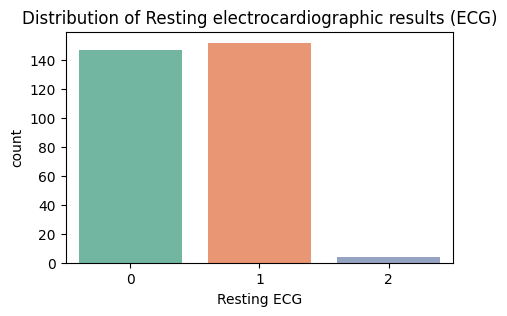

In [83]:
# Counts plot of Resting ECG column
plt.figure(figsize=(5, 3))
sns.countplot(x=data["Resting ECG"], palette="Set2", hue = data["Resting ECG"], legend = False)
plt.title("Distribution of Resting electrocardiographic results (ECG)")
plt.show()

=====> Resting ECG results are more in categories 0 and 1, with very few in category 2, indicating most individuals show normal or slightly abnormal ECG results.

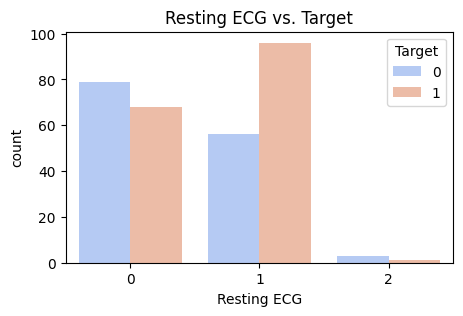

In [84]:
# Distribution of Resting ECG vs target variable
plt.figure(figsize=(5, 3))
sns.countplot(x=data["Resting ECG"], hue=data["Target"], palette="coolwarm")
plt.title("Resting ECG vs. Target")
plt.show()

=====> Resting ECG value 0 is more common in those without heart disease, value 1 is more frequent in those with heart disease, and value 2 has very few cases overall.

#### **8. Max Heart Rate**

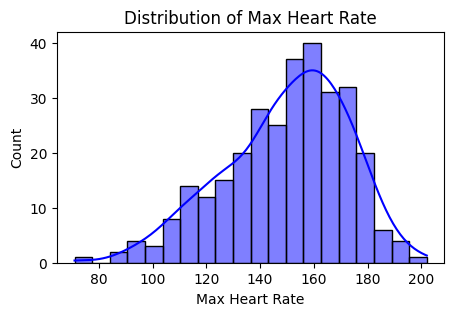

In [86]:
# Histogram plot of Max Heart Rate
plt.figure(figsize=(5, 3))
sns.histplot(data["Max Heart Rate"], kde=True, bins=20, color="blue")
plt.title("Distribution of Max Heart Rate")
plt.show()

=====> The histogram shows that the maximum heart rates are distributed normally, peaking around 160, indicating this is the most common range in the population.

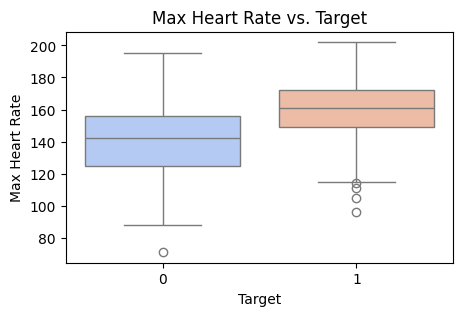

In [87]:
# Distribution of Max Heart Rate along with target variable
plt.figure(figsize=(5, 3))
sns.boxplot(x=data["Target"], y=data["Max Heart Rate"], palette="coolwarm", hue = data["Target"], legend = False)
plt.title("Max Heart Rate vs. Target")
plt.show()

=====> Individuals with heart disease have medium or more Max Heart Rate, where no disease individuals have slightly less heart rate.

#### **9. Exercise Induced Angina**

In [88]:
# Values counts for Exercise Induced Angina
print(data["Exercise Induced Angina"].value_counts())

Exercise Induced Angina
0    204
1     99
Name: count, dtype: int64


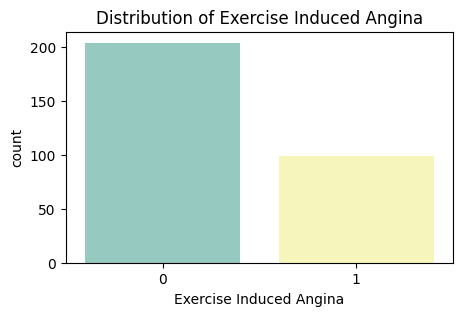

In [91]:
# Countplot for Exercise Induced Angina
plt.figure(figsize=(5, 3))
sns.countplot(x=data["Exercise Induced Angina"], palette="Set3", hue = data["Exercise Induced Angina"], legend = False)
plt.title("Distribution of Exercise Induced Angina")
plt.show()

=====> Most individuals do not experience exercise-induced angina (category 0), while a smaller group does (category 1).

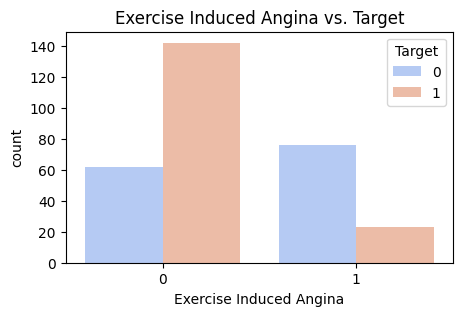

In [92]:
# Distribution of Exercise Induced Angina vs Target variable
plt.figure(figsize=(5, 3))
sns.countplot(x=data["Exercise Induced Angina"], hue=data["Target"], palette="coolwarm")
plt.title("Exercise Induced Angina vs. Target")
plt.show()

=====> Individuals without exercise-induced angina (angina=0) are more likely to have heart disease (target=1), whereas those with angina (angina=1) are less likely to have heart disease.

#### **10. ST Depression**

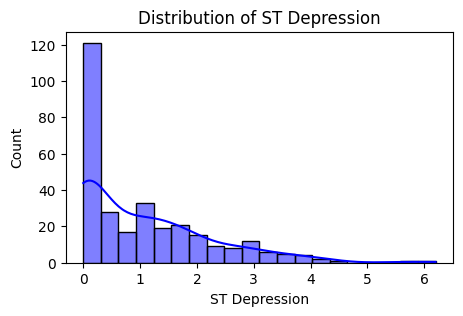

In [93]:
# Histogram plot of ST Depression
plt.figure(figsize=(5, 3))
sns.histplot(data["ST Depression"], kde=True, bins=20, color="blue")
plt.title("Distribution of ST Depression")
plt.show()

=====> ST Depression values are most frequent around 0, with the frequency decreasing as we move towards right side, indicating lower frequent around 6.

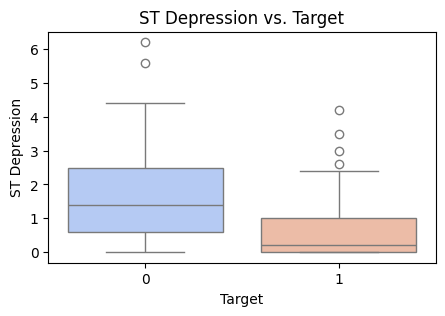

In [95]:
# Distribution of ST Depression vs Target variable
plt.figure(figsize=(5, 3))
sns.boxplot(x=data["Target"], y=data["ST Depression"], palette="coolwarm", hue = data["Target"], legend = False)
plt.title("ST Depression vs. Target")
plt.show()

=====> Individuals without heart disease (target=0) tend to have higher ST Depression levels, while those with heart disease (target=1) show generally lower levels.

#### **11. Slope of ST Segment**

In [96]:
# Slope of ST Segment values counts
print(data["Slope of ST Segment"].value_counts())

Slope of ST Segment
2    142
1    140
0     21
Name: count, dtype: int64


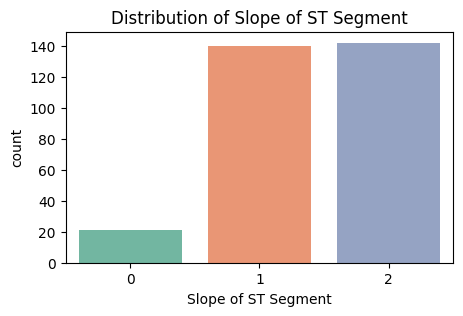

In [ ]:
# Count plot of Slope of ST Segment
plt.figure(figsize=(5, 3))
sns.countplot(x=data["Slope of ST Segment"], palette="Set2", hue = data["Slope of ST Segment"], legend = False)
plt.title("Distribution of Slope of ST Segment")
plt.show()

=====> The majority of individuals have a slope of 1 or 2 for the peak exercise ST segment, while very few have a slope of 0.

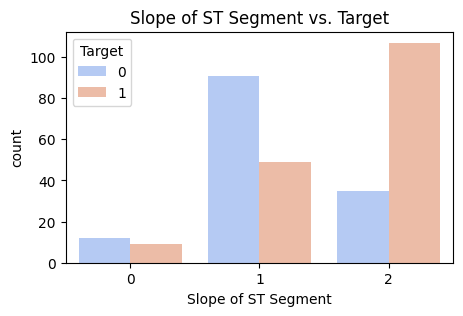

In [98]:
# Distribution of Slope of ST Segment
plt.figure(figsize=(5, 3))
sns.countplot(x=data["Slope of ST Segment"], hue=data["Target"], palette="coolwarm")
plt.title("Slope of ST Segment vs. Target")
plt.show()

=====> Slope 1 is more common in individuals without heart disease, while slope 2 is more frequent in those with heart disease. Slope 0 is the least common overall.



#### **12. Number of Major Vessels**

In [99]:
# Values counts of Number of Major Vessels
print(data["Number of Major Vessels"].value_counts())

Number of Major Vessels
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64


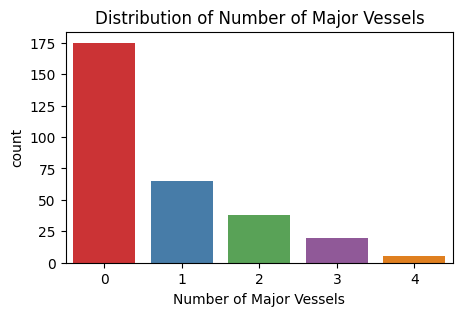

In [100]:
# Count plot of Number of Major Vessels
plt.figure(figsize=(5, 3))
sns.countplot(x=data["Number of Major Vessels"], palette="Set1", hue = data["Number of Major Vessels"], legend = False)
plt.title("Distribution of Number of Major Vessels")
plt.show()

====> Individuals with 0 major vessels are the most common, while those with 4 are the least, showing a decreasing trend as the number of major vessels increases.

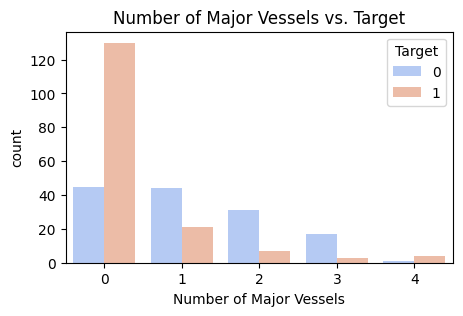

In [101]:
# Distribution of Number of Major Vessels with targget variable
plt.figure(figsize=(5, 3))
sns.countplot(x=data["Number of Major Vessels"], hue=data["Target"], palette="coolwarm")
plt.title("Number of Major Vessels vs. Target")
plt.show()

=====> Individuals with 0 major vessels are more likely to have heart disease (target=1), while those with 1 or more major vessels are more likely to not have heart disease (target=0).

#### **13. Thalassemia**

In [102]:
# Values counts of Thalassemia
print(data["Thalassemia"].value_counts())

Thalassemia
2    166
3    117
1     18
0      2
Name: count, dtype: int64


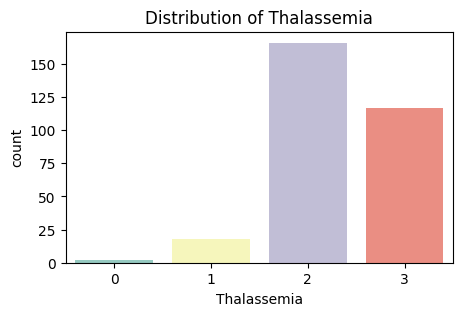

In [103]:
# Distribution of Thalassemia
plt.figure(figsize=(5, 3))
sns.countplot(x=data["Thalassemia"], palette="Set3", hue = data["Thalassemia"], legend = False)
plt.title("Distribution of Thalassemia")
plt.show()

=====> Thalassemia categories 2 and 3 are the most common, with category 2 having the highest count, while categories 0 and 1 are significantly less frequent.

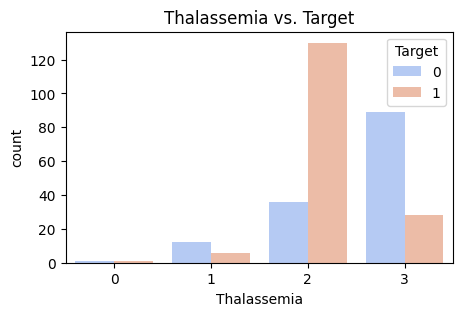

In [105]:
# Distribution of Thalassemia across target variables
plt.figure(figsize=(5, 3))
sns.countplot(x=data["Thalassemia"], hue=data["Target"], palette="coolwarm")
plt.title("Thalassemia vs. Target")
plt.show()

=====> Thalassemia value 2 is strongly linked to heart disease (target=1), while value 3 is more common in those without heart disease (target=0). Values 0 and 1 are much less frequent overall.

### **Step 4: Data Cleaning**
In this step, we'll handle missing values, duplicate values, and outliers to ensure the dataset is clean for model training.

In [106]:
# Check for missing values
print(data.isnull().sum())

Age                        0
Sex                        0
Chest Pain Type            0
Resting Blood Pressure     0
Cholesterol                0
Fasting Blood Sugar        0
Resting ECG                0
Max Heart Rate             0
Exercise Induced Angina    0
ST Depression              0
Slope of ST Segment        0
Number of Major Vessels    0
Thalassemia                0
Target                     0
dtype: int64


In [ ]:
# #If there are missing values, handle them using imputation methods (mean, median, or mode).
# # Fill missing values (example: using median for numerical columns)
# data.fillna(dataset.median(), inplace=True)

# If categorical columns have missing values, you can fill them with the most frequent value:
# # Fill missing values in categorical columns with mode
# data['Thalassemia'].fillna(data['Thalassemia'].mode()[0], inplace=True)

In [108]:
# Check for duplicate rows
print(f"Duplicate Rows: {data.duplicated().sum()}")


Duplicate Rows: 1


In [109]:
# Remove duplicate rows if any
data.drop_duplicates(inplace=True)

In [110]:
# Check for duplicate rows
print(f"Duplicate Rows After Removing: {data.duplicated().sum()}")

Duplicate Rows After Removing: 0


#### **Detect and Handle Outliers**

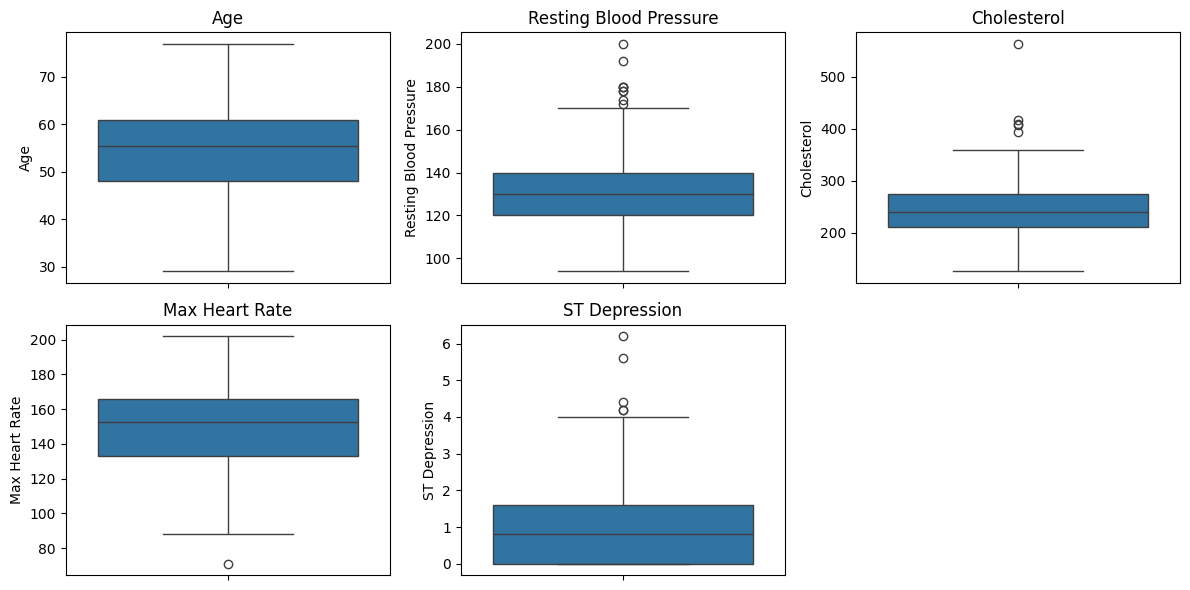

In [ ]:
# Plot boxplots for numerical columns
numerical_columns = ['Age', 'Resting Blood Pressure', 'Cholesterol', 'Max Heart Rate', 'ST Depression']
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


======> From above box plot, we clearly see that there are no outliers present in the numericals coumns, only few outliers are present in some column which doesnot affect out data. So there are no need to remove outliers. Its ok.

### **Step 5: Split Data into Train and Test Sets**

In [113]:
from sklearn.model_selection import train_test_split

# Separate the datasets into Features and Target Variables
X = data.drop("Target", axis=1)  # Features
y = data["Target"]  # Target variable

# Split the datasets into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing data
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (241, 13)
Shape of X_test: (61, 13)
Shape of y_train: (241,)
Shape of y_test: (61,)


### **Step 5: Data Preprocessing**
#### **When to Use Standardization or Normalization for our Projects?**

1. **Normalization (Min-Max Scaling)**
   - Scales values between 0 and 1 or -1 and 1.
   - Useful for algorithms like **KNN, Neural Networks, and Gradient Descent-based models (Logistic Regression, SVM, etc.)**.
   - Recommended when the data does not follow a normal distribution.
   
2. **Standardization (Z-score Scaling)**
   - Transforms data to have zero mean and unit variance.
   - Useful for **distance-based models like SVM, PCA, and k-means clustering**.
   - Recommended when the data follows a normal (Gaussian) distribution.
  
#### **Which to Choose?**
- **For Deep Learning or Gradient Descent-based models** ===> Normalization (Min-Max Scaling).  
- **For Distance-based models (SVM, KNN, PCA, etc.)** ===> Standardization (Z-score Scaling).  
- **For Tree-based models (Decision Trees, Random Forest, XGBoost, etc.)** ===> No Scaling Needed (since trees are not affected by feature scales).

------------

we're using a mix of **distance-based, tree-based, and neural network models**, the best approach is to **apply standardization or normalization only to specific models** while leaving tree-based models unscaled.  

### **Best Preprocessing Approach for our Models**  

| **Model**                        | **Scaling Required?** | **Type of Scaling** |
|----------------------------------|----------------------|----------------------|
| **A: Logistic Regression**       | ✅ Yes  | Standardization (Z-score) or Normalization |
| **B: Naive Bayes**               | ❌ No   | No Scaling Needed (Handles probabilities directly) |
| **C: Support Vector Machine**    | ✅ Yes  | Standardization (Z-score) |
| **D: K-Nearest Neighbours**      | ✅ Yes  | Normalization (Min-Max Scaling) |
| **E: Decision Tree**             | ❌ No   | No Scaling Needed |
| **F: Random Forest**             | ❌ No   | No Scaling Needed |
| **G: XGBoost**                   | ❌ No   | No Scaling Needed |
| **H: Artificial Neural Network** | ✅ Yes  | Normalization (Min-Max Scaling) |

#### **=====> Before applying standardization and normalization, we need to:**
 ✅ Separate categorical and numerical columns.

 ✅ Apply encoding to categorical variables (But it is not recommended because these categorical columns are already in numeric form. If anyone try to apply its ok, no problems.).

 ✅ Apply standardization to numerical features (for Logistic Regression & SVM).

 ✅ Apply normalization to numerical features (for KNN & Neural Networks).

 ✅ No Scaling needed (For Naive Bayes, Decision Tree, Random Forest, XGBoost).

 ✅ Recombine categorical and numerical features.